In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression.csv')

In [20]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


# KNN -  K Nearest Neighbors - Classification

To understand KNN for classification, we'll work with a simple dataset representing gene expression levels. Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes). This dataset is synthetic and specifically designed to show some of the strengths and limitations of using KNN for Classification.


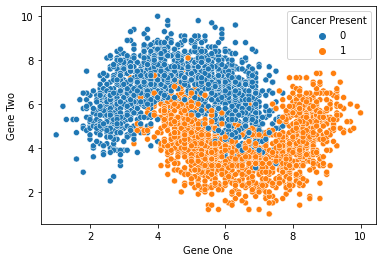

In [4]:
sns.scatterplot(data = df, x='Gene One', y='Gene Two', hue='Cancer Present');

In [5]:
len(df)

3000

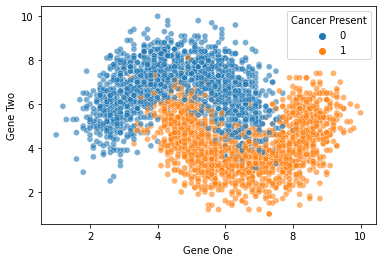

In [6]:
sns.scatterplot(data = df, x='Gene One', y='Gene Two', 
                hue='Cancer Present', alpha = 0.6);

#### As we have many points overlapping eachother we can also check for different x and y limits to see that

(4.0, 8.0)

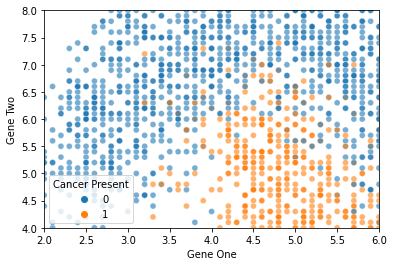

In [8]:
sns.scatterplot(data = df, x='Gene One', y='Gene Two', 
                hue='Cancer Present', alpha = 0.6);
plt.xlim(2,6)
plt.ylim(4,8)

At this point we can see where the points are overlapping eachother.

(4.0, 8.0)

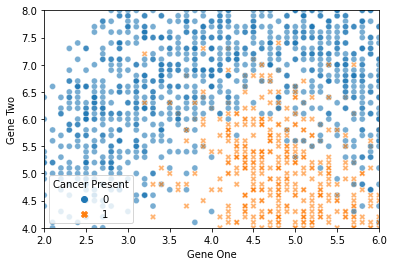

In [13]:
sns.scatterplot(data = df, x='Gene One', y='Gene Two', 
                hue='Cancer Present', alpha = 0.6, style='Cancer Present');

plt.xlim(2,6)
plt.ylim(4,8)

So here we can see the overlapping of the points even clearer with the X's and O's style marker.

In [14]:
# We can also see a pairplot since we are dealing with small dataset.

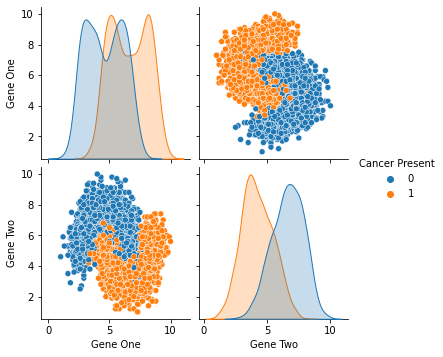

In [15]:
sns.pairplot(data=df,hue='Cancer Present');

In [16]:
# Feature selection

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X = df.drop('Cancer Present', axis=1)

In [19]:
y = df['Cancer Present']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)

In [25]:
scaled_X_test = scaler.transform(X_test)

### KNN model creation

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#help(KNeighborsClassifier)

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=1)

We will start of with a simple model for no of neighbors = 1

In [31]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
#predictions
y_pred = knn_model.predict(scaled_X_test)

In [34]:
#evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.8922222222222222

In [36]:
confusion_matrix(y_test, y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

It looks like we are performing quite well

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



So we can see that pretty uch the precision and accuracy are in-line with the accuracy of the model and that is what we want. This also tells us hat we are not dealing with an imbalanced dataset.

In [38]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

So as said above we dont have imbalanced classes.

## Choosing best K value.

### Now for next step what we want to decide is what is the best value for K.
 In that case we might need to do 
 1. Elbow method
 2. Cross validation

##### 1. Elbow method
Running a for loop to select the best K value

In [40]:
test_error_rates = []

for k in range(1,30):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    
    KNN_model.fit(scaled_X_train, y_train)
    
    y_preds = KNN_model.predict(scaled_X_test)
    
    errors = 1 - accuracy_score(y_test, y_preds)
    
    test_error_rates.append(errors)

In [41]:
test_error_rates

[0.10777777777777775,
 0.09999999999999998,
 0.07444444444444442,
 0.07666666666666666,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

In [47]:
K_value = np.arange(1,30)
K_value

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [50]:
data = {'k_value':K_value, 'error_rate':test_error_rates}
erro_rt = pd.DataFrame(data=data)
erro_rt

,k_value,error_rate
0,1,0.107778
1,2,0.100000
2,3,0.074444
3,4,0.076667
4,5,0.072222
5,6,0.064444
6,7,0.064444
7,8,0.062222
8,9,0.060000
9,10,0.062222


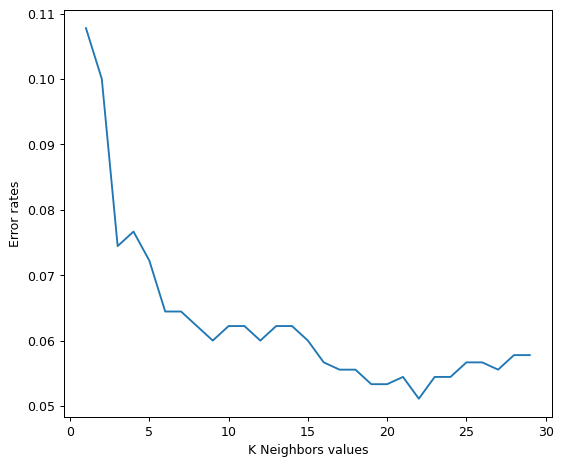

In [53]:
plt.figure(figsize=(7,6),dpi=90)
plt.plot(erro_rt.k_value, erro_rt.error_rate)
plt.xlabel('K Neighbors values')
plt.ylabel('Error rates');

Thus we can see that for initial values of K there is more error but as we increase the value K Neighbors  the errors goes down and after some point it stays at this level only.

Here we can see k=6 is the point from where the error is not going down that much so we should select it. Also one might be tempted to use k=22 becuase it seems to have the lowest error point, but it depends on us if we would rather take that risk to go that far.

### Setting up a pipeline

We are going to set up a pipeline that way we can have our scaler and K-nearest neighbors already set up so that we can feed them raw unscaled data i.e., X-train and X_test.

### Creating a Pipeline to find K value

**Follow along very carefully here! We use very specific string codes AND variable names here so that everything matches up correctly. This is not a case where you can easily swap out variable names for whatever you want!**

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

----
*How does the Scaler work inside a Pipeline with CV? Is scikit-learn "smart" enough to understand .fit() on train vs .transform() on train and test?**

**Yes! Scikit-Learn's pipeline is well suited for this! [Full Info in Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) **

When you use the StandardScaler as a step inside a Pipeline then scikit-learn will internally do the job for you.

What happens can be discribed as follows:

* Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.
* Step 1: the scaler is fitted on the TRAINING data
* Step 2: the scaler transforms TRAINING data
* Step 3: the models are fitted/trained using the transformed TRAINING data
* Step 4: the scaler is used to transform the TEST data
* Step 5: the trained models predict using the transformed TEST data

----

In [54]:
# Pipeline ----->GridSearchCV

In [55]:
scaler = StandardScaler()

In [56]:
knn = KNeighborsClassifier()

In [58]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [59]:
# For creating a pipeline we need the exact same strig codes as above.

In [60]:
operations = [('scaler',scaler),('knn',knn)]

### SO these are the set of operation we want to perform in the pipeline and we need to make sure that the name: var_names should match perfectly.
 
The ordering of the operations also matter, so first we will scale the data and then create a model.

Now it is time to set up our pipeline.

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
pipe = Pipeline(steps=operations)

In [64]:
# Now GridSearchCV
from sklearn.model_selection import GridSearchCV

In [65]:
# The diff k-values that we want to test out
k_val = list(range(1,20))

In [68]:
param_grid = {'knn__n_neighbors':k_val}

---
*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

---

In [69]:
# Parameter is ready 
# Pipeline is ready

# Now GridSearch

In [70]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [71]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

### So here while fitting we don't need to scale the data, the pipeline will do it.

In [73]:
# Lets check out the best parameters
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### So above we can se ethe best parameters the model selected and we can see it selected k=14 as best.

### So now that we have the best values we can retrain this model on every data, which uses k=14 or we could also use this full_cv_classifier. 

In [74]:
new_preds = full_cv_classifier.predict(X_test)

Note that for this new full_cv_classifier we dont need to scale the X_test, the scaler is already present inside the full_cv_classifier.

In [75]:
new_preds

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [76]:
#Evaluation

In [77]:
accuracy_score(y_test, new_preds)

0.9377777777777778

This time we have high accuracy, with best K nearest neighbors value as 14.

In [78]:
confusion_matrix(y_test, new_preds)

array([[448,  22],
       [ 34, 396]], dtype=int64)

In [81]:
print(classification_report(y_test, new_preds))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [82]:
# Let's try and predict some new values.

In [83]:
new_patients = [[3.8, 6.4]]

In [84]:
full_cv_classifier.predict(new_patients)

array([0], dtype=int64)

In [85]:
full_cv_classifier.predict_proba(new_patients)

array([[1., 0.]])

### So our model is 100% sure that the new patient is not a cancer patient